In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import os
import glob
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import random

import pandas as pd
import os

from utils.constants import (
    DATASETS_PATH,
    CATEGORICAL_FEATURES,
    CONTINUOUS_FEATURES,
    RANDOM_SEED
)

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

df = pd.read_csv(os.path.join(DATASETS_PATH,'dataset.csv'))

df_one_hot = pd.get_dummies(data=df[CATEGORICAL_FEATURES])

<Axes: >

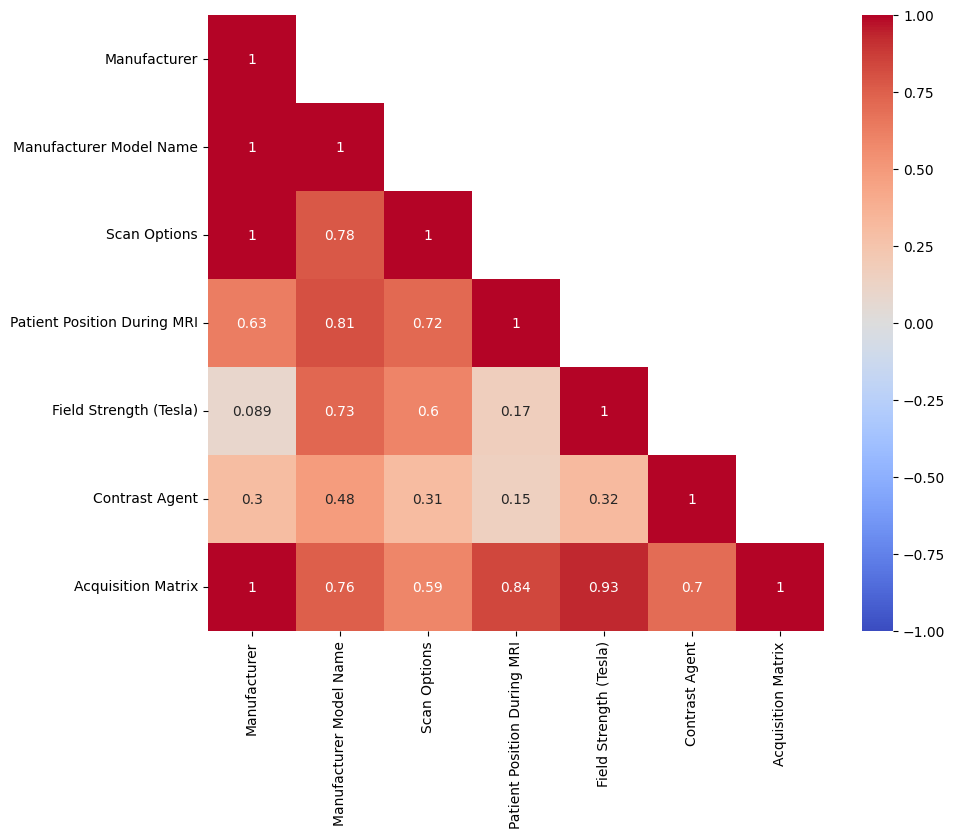

In [6]:
corr = np.zeros((len(CATEGORICAL_FEATURES),len(CATEGORICAL_FEATURES)))

for i,col1 in enumerate(df[CATEGORICAL_FEATURES]):
    for j,col2 in enumerate(df[CATEGORICAL_FEATURES]):
        
        CrosstabResult=pd.crosstab(index=df[col1],columns=df[col2])

        X2 = stats.chi2_contingency(CrosstabResult, correction=False)[0]

        N = np.sum(CrosstabResult.values)
        minimum_dimension = min(CrosstabResult.shape)-1
        
        # Calculate Cramer's V 
        result = np.sqrt((X2/N) / minimum_dimension) 

        corr[i,j] = result
            
corr = pd.DataFrame(corr, columns=CATEGORICAL_FEATURES)
corr = corr.set_axis(CATEGORICAL_FEATURES, axis='index')

f, ax = plt.subplots(figsize=(10, 8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)] = True

sns.heatmap(corr,
    cmap=sns.color_palette("coolwarm", as_cmap=True),
    vmin=-1, vmax=1.0,
    square=True, ax=ax, mask=mask, annot= True)

<Axes: >

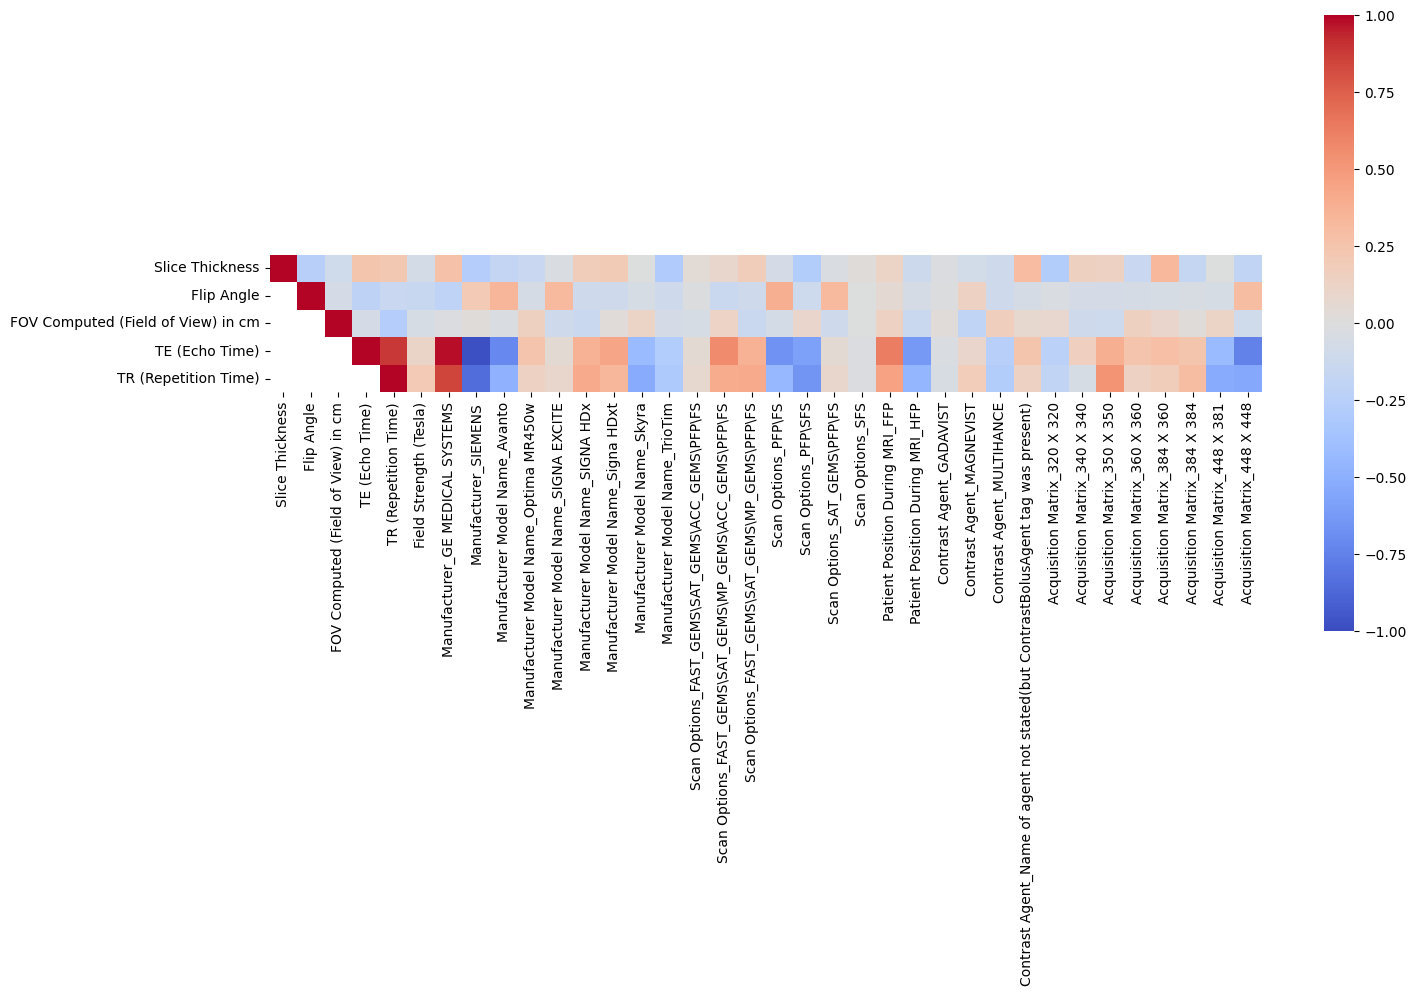

In [7]:
corr = np.zeros((len(CONTINUOUS_FEATURES),len(CONTINUOUS_FEATURES)+len(df_one_hot.columns)))

joined_df = df[CONTINUOUS_FEATURES].join(df_one_hot)

for i,col1 in enumerate(df[CONTINUOUS_FEATURES]):
    for j,col2 in enumerate(joined_df):
        
        if j<len(df.columns[-4:]):
            corr[i,j] = stats.pearsonr(df[col1], df[col2])[0]
            
        else:
            corr[i,j] =stats.pointbiserialr(joined_df[col2], joined_df[col1])[0]
            
corr = pd.DataFrame(corr, columns=joined_df.columns)
corr = corr.set_axis(CONTINUOUS_FEATURES, axis='index')

f, ax = plt.subplots(figsize=(16, 8))

mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask,k=-1)] = True

sns.heatmap(corr,
    cmap=sns.color_palette('coolwarm', as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, mask=mask)